In [20]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486 entries, 0 to 6485
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6486 non-null   float64
 1   volatile acidity      6486 non-null   float64
 2   citric acid           6486 non-null   float64
 3   residual sugar        6486 non-null   float64
 4   chlorides             6486 non-null   float64
 5   free sulfur dioxide   6486 non-null   float64
 6   total sulfur dioxide  6486 non-null   float64
 7   density               6486 non-null   float64
 8   pH                    6486 non-null   float64
 9   sulphates             6486 non-null   float64
 10  alcohol               6486 non-null   float64
 11  quality               6486 non-null   int64  
 12  type_num              6486 non-null   int64  
 13  alc-sug               6486 non-null   float64
 14  qua-sug               6486 non-null   float64
 15  aci-type             

In [10]:
df['quality'].value_counts()

quality
6    2835
5    2134
7    1079
4     214
8     193
3      26
9       5
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=10)

In [18]:
test['quality'].value_counts()

quality
6    567
5    416
7    222
4     45
8     44
3      2
9      2
Name: count, dtype: int64

In [22]:
train['quality'].value_counts()

quality
6    2268
5    1718
7     857
4     169
8     149
3      24
9       3
Name: count, dtype: int64

In [23]:
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
with open('../../models/trained_model_reg_2GBR.pkl', 'rb') as archivo:
    final_model = pickle.load(archivo)

X = test.drop(columns='quality')
y = test['quality']



y_pred = final_model.predict(X)

mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.1345209283124409
Mean Absolute Percentage Error (MAPE): 2.322978838427008%
Mean Squared Error (MSE): 0.11851091271994421
Root Mean Squared Error (RMSE): 0.3442541397281145


In [19]:
with open('../../models/trained_model_2gb.pkl', 'rb') as gb :
    gb_model = pickle.load(gb)

NameError: name 'pickle' is not defined

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred2 = gb_model.predict(X)

cm5 = confusion_matrix(y, y_pred2)
accuracy5 = accuracy_score(y, y_pred2)
print("Matriz de Confusión:")
print(cm5)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy5 * 100))

Matriz de Confusión:
[[  2   0   0   0   0   0   0]
 [  0  41   3   1   0   0   0]
 [  1   1 378  34   2   0   0]
 [  0   2  40 501  22   2   0]
 [  0   1   3  12 205   1   0]
 [  0   0   0   3   4  36   1]
 [  0   0   0   0   0   0   2]]

Tasa de Aciertos (Accuracy): 89.75%


In [4]:
corr =df.corrwith(df['quality']).abs().sort_values(ascending=False)[1:]

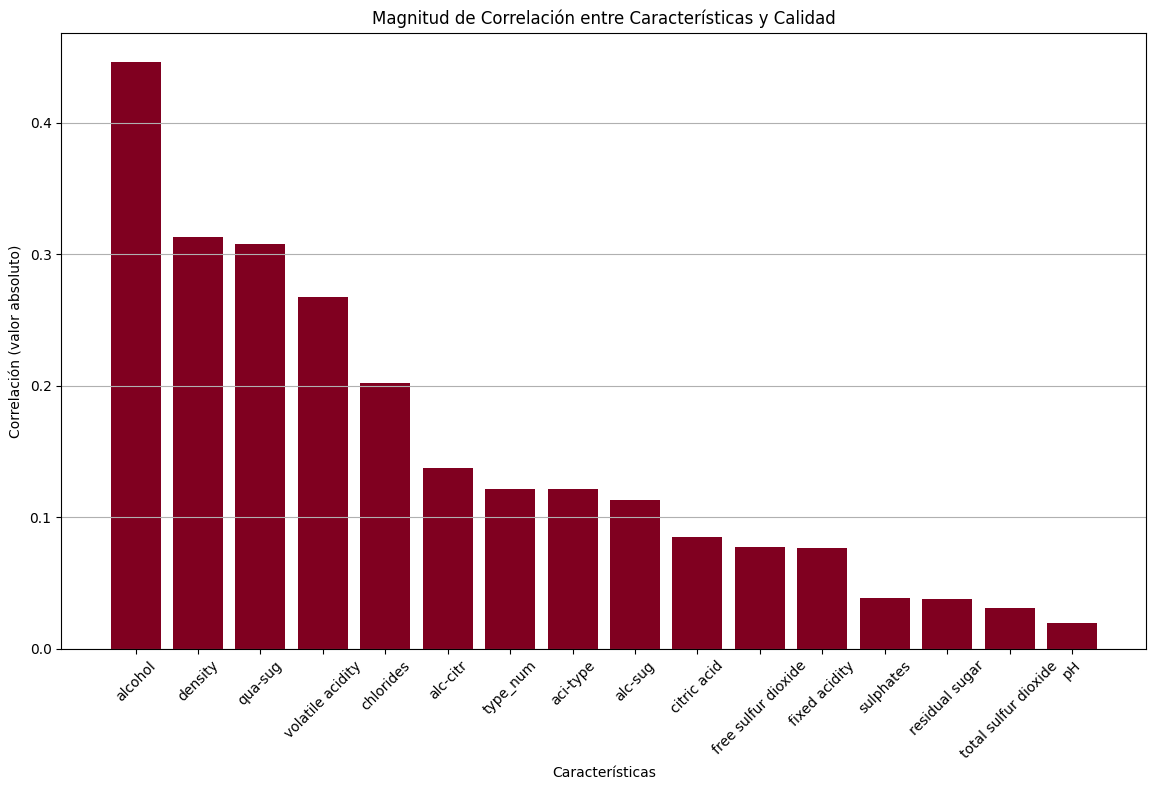

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8)) 
plt.bar(corr.index, corr.values, color='#800020')
plt.xlabel('Características')
plt.ylabel('Correlación (valor absoluto)')
plt.title('Magnitud de Correlación entre Características y Calidad')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.show()

In [15]:
df3 = pd.read_csv('../../data/raw/wine-quality-white-and-red.csv')

In [17]:
df3.drop(columns='type', inplace=True)

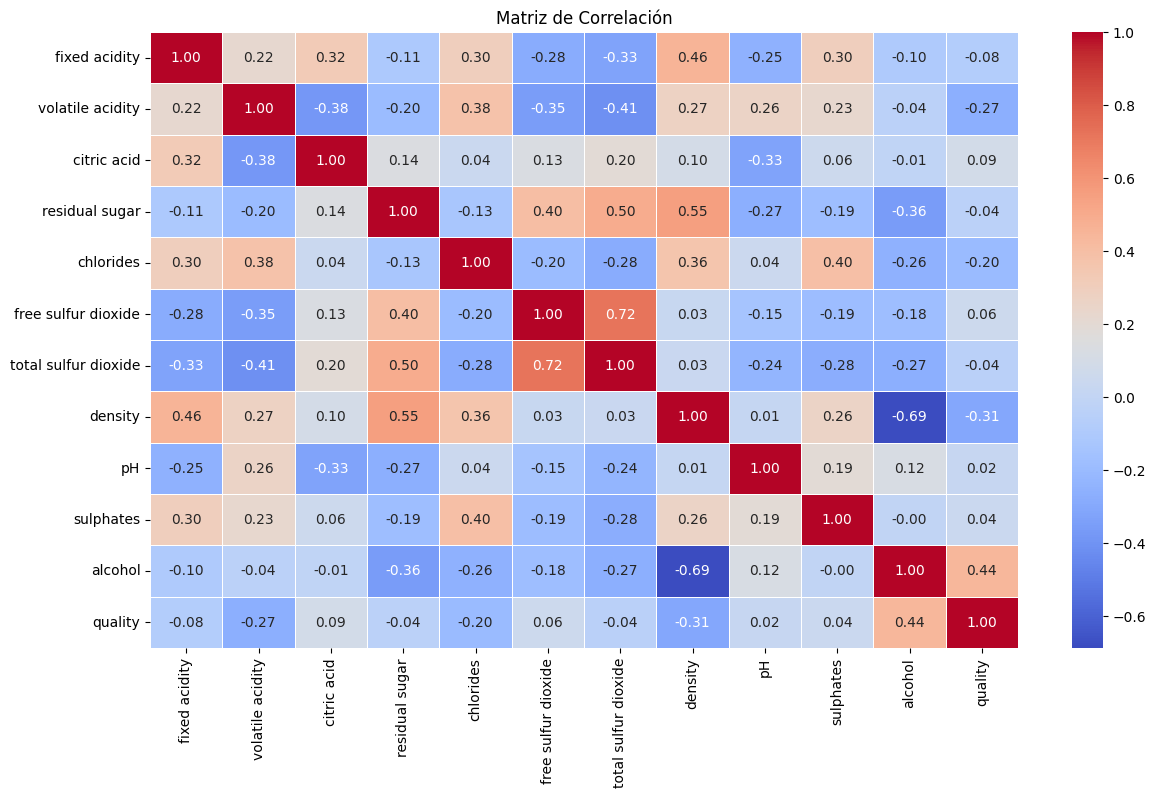

In [18]:
plt.figure(figsize=(14, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [22]:
import pandas as pd
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

df4 = pd.read_csv('../../data/test.csv')

with open('../../models/trained_model_reg_2GBR.pkl', 'rb') as archivo:
    final_model = pickle.load(archivo)

X = df4.drop(columns='quality')
y = df4['quality']



y_pred = final_model.predict(X)

mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.1437630517740377
Mean Absolute Percentage Error (MAPE): 2.622878504956207%
Mean Squared Error (MSE): 0.13138993696312906
Root Mean Squared Error (RMSE): 0.3624774985611232


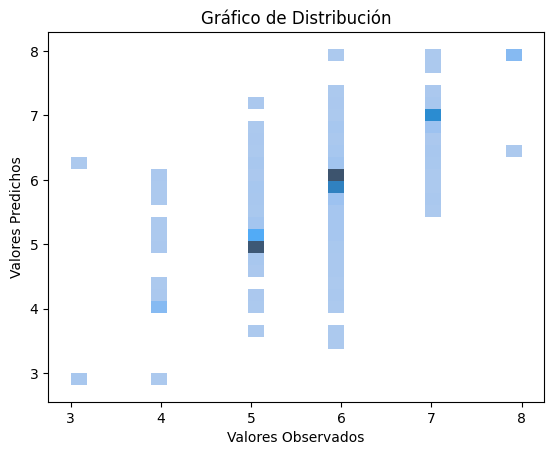

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'y_true' son los valores observados y 'y_pred' son los valores predichos por tu modelo
sns.histplot(x=y, y=y_pred)
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Distribución")
plt.show()

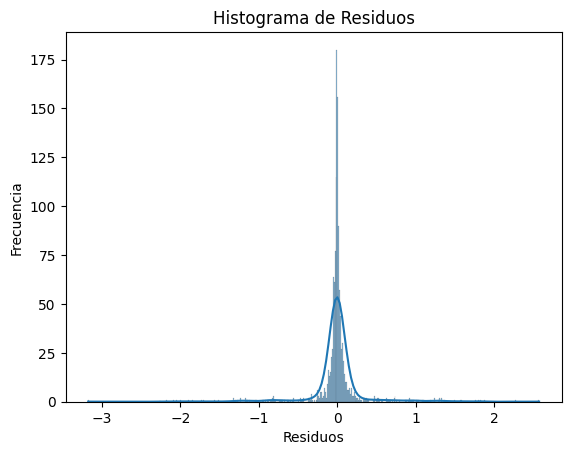

In [25]:
# Supongamos que 'y_true' son los valores observados y 'y_pred' son los valores predichos por tu modelo
residuals = y - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

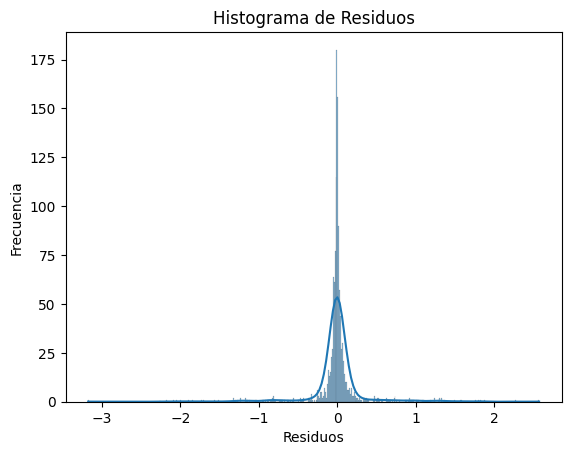

In [28]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

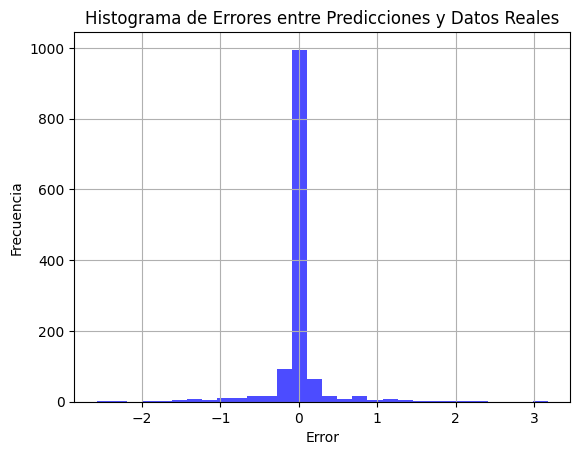

In [34]:
errores = np.array(y_pred) - np.array(y)

# Crear el histograma
plt.hist(errores, bins=30, color='blue', alpha=0.7)

# Personalizar el gráfico
plt.title('Histograma de Errores entre Predicciones y Datos Reales')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()

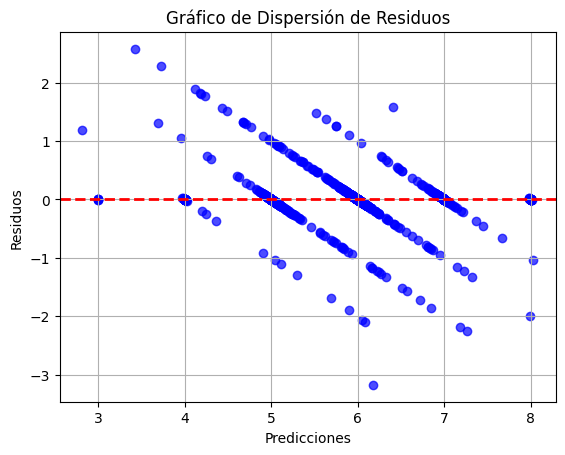

MSE de los residuos: 0.13138993696312906


In [42]:
residuos = np.array(y) - np.array(y_pred)

# Calcular el MSE de los residuos (puedes usarlo para evaluar la calidad de la predicción)
mse_residuos = mean_squared_error(y, y_pred)

# Crear el gráfico de dispersión de los residuos
plt.scatter(y_pred, residuos, color='blue', alpha=0.7)

# Añadir una línea horizontal en y=0 para facilitar la visualización de los residuos
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Personalizar el gráfico
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Mostrar el MSE de los residuos
print(f'MSE de los residuos: {mse_residuos}')